In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

In [3]:
img_arr = cv2.imread("Training/0/Training_3908.jpg")

In [9]:
img_arr.shape

(48, 48, 3)

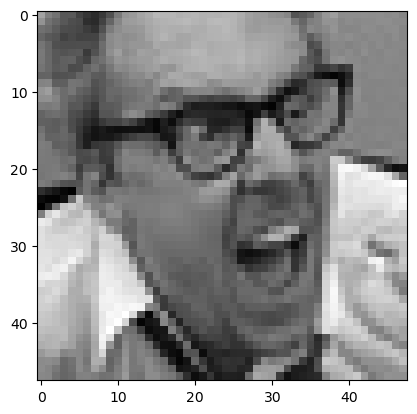

In [10]:
plt.imshow(img_arr)

In [11]:
Datadirectory = "Training/"

In [12]:
Classes = ["0","1","2","3","4","5","6"]

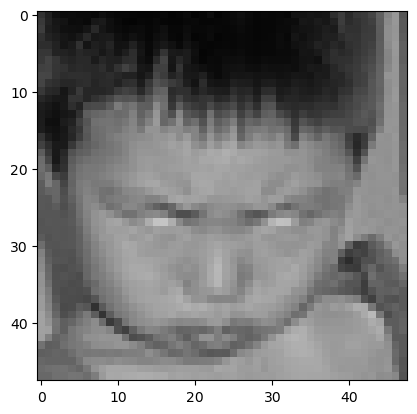

In [13]:
for category in Classes:
    path = os.path.join(Datadirectory, category)
    for img in os.listdir(path):
        img_arr = cv2.imread(os.path.join(path, img))
        plt.imshow(cv2.cvtColor(img_arr, cv2.COLOR_BGR2RGB))
        plt.show()
        break
    break

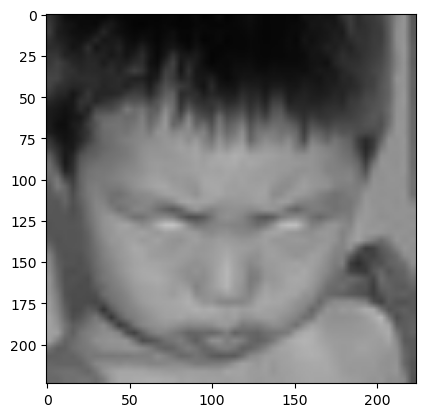

In [14]:
img_size = 224
new_arr = cv2.resize(img_arr, (img_size,img_size))
plt.imshow(cv2.cvtColor(new_arr, cv2.COLOR_BGR2RGB))
plt.show()

In [15]:
new_arr.shape

(224, 224, 3)

In [21]:
import random
training_data = []

def create_training_data():
    all_images = []
    
    # Tüm kategorilerden tüm görüntü yollarını topla
    for category in Classes:
        path = os.path.join(Datadirectory, category)
        class_num = Classes.index(category)
        for img in os.listdir(path):
            image_path = os.path.join(path, img)
            all_images.append((image_path, class_num))
    
    # Rastgele 11000 görüntü seç
    random_samples = random.sample(all_images, 11000)
    
    # Seçilen görüntüleri işle
    for image_path, class_num in random_samples:
        try:
            img_arr = cv2.imread(image_path)
            new_arr = cv2.resize(img_arr, (img_size, img_size))
            training_data.append([new_arr, class_num])
        except Exception as e:
            print(e)  # Hata durumunda hatayı yazdır

# Fonksiyonu çağır
create_training_data()

In [22]:
print(len(training_data))

11000


In [23]:
import random

random.shuffle(training_data)

In [24]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)
    
    
X = np.array(X).reshape(-1, img_size, img_size, 3)

In [25]:
X.shape

(11000, 224, 224, 3)

In [26]:
X= X/255.0;

In [27]:
y[1000]

6

In [28]:
y[0]

2

In [29]:
type(y)

list

In [30]:
Y= np.array(y)

In [31]:
Y.shape

(11000,)

In [48]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [49]:
model = tf.keras.applications.MobileNetV2()

In [50]:
model.summary()

Model: "mobilenetv2_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)    │ (None, 224, 224, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1 (Conv2D)                │ (None, 112, 112, 32)      │             864 │ input_layer_1[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ bn_Conv1 (BatchNormalization) │ (None, 112, 112, 32)      │             128 │ Conv1[0][0]                │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1_relu (ReLU)             │ (None, 112, 112, 32)      │               0 │ bn_Conv1[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise       │ (None, 112, 112, 32)      │             288 │ Conv1_relu[0][0]           │
│ (DepthwiseConv2D)             │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_BN    │ (None, 112, 112, 32)      │             128 │ expanded_conv_depthwise[0… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_relu  │ (None, 112, 112, 32)      │               0 │ expanded_conv_depthwise_B… │
│ (ReLU)                        │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project         │ (None, 112, 112, 16)      │             512 │ expanded_conv_depthwise_r… │
│ (Conv2D)                      │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project_BN      │ (None, 112, 112, 16)      │              64 │ expanded_conv_project[0][… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand (Conv2D)       │ (None, 112, 112, 96)      │           1,536 │ expanded_conv_project_BN[… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_BN             │ (None, 112, 112, 96)      │             384 │ block_1_expand[0][0]       │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_relu (ReLU)    │ (None, 112, 112, 96)      │               0 │ block_1_expand_BN[0][0]    │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_pad (ZeroPadding2D)   │ (None, 113, 113, 96)      │               0 │ block_1_expand_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_depthwise             │ (None, 56, 56, 96)        │             864 │ block_1_pad[0][0]          │
│ (DepthwiseConv2D)             │                           │               

 Total params: 3,538,984 (13.50 MB)

 Trainable params: 3,504,872 (13.37 MB)

 Non-trainable params: 34,112 (133.25 KB)

In [59]:
base_input = model.input

In [60]:
base_output = model.layers[-2].output

In [61]:
base_output

<KerasTensor shape=(None, 1280), dtype=float32, sparse=False, name=keras_tensor_328>

In [62]:
final_output = layers.Dense(128)(base_output)
final_output = layers.Activation('relu')(final_output)
final_output = layers.Dense(64)(final_output)
final_output = layers.Activation('relu')(final_output)
final_output = layers.Dense(7, activation='softmax')(final_output)

In [63]:
final_output

<KerasTensor shape=(None, 7), dtype=float32, sparse=False, name=keras_tensor_344>

In [65]:
new_model = keras.Model(inputs=base_input, outputs=final_output)

In [67]:
new_model.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)    │ (None, 224, 224, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1 (Conv2D)                │ (None, 112, 112, 32)      │             864 │ input_layer_1[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ bn_Conv1 (BatchNormalization) │ (None, 112, 112, 32)      │             128 │ Conv1[0][0]                │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1_relu (ReLU)             │ (None, 112, 112, 32)      │               0 │ bn_Conv1[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise       │ (None, 112, 112, 32)      │             288 │ Conv1_relu[0][0]           │
│ (DepthwiseConv2D)             │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_BN    │ (None, 112, 112, 32)      │             128 │ expanded_conv_depthwise[0… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_relu  │ (None, 112, 112, 32)      │               0 │ expanded_conv_depthwise_B… │
│ (ReLU)                        │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project         │ (None, 112, 112, 16)      │             512 │ expanded_conv_depthwise_r… │
│ (Conv2D)                      │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project_BN      │ (None, 112, 112, 16)      │              64 │ expanded_conv_project[0][… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand (Conv2D)       │ (None, 112, 112, 96)      │           1,536 │ expanded_conv_project_BN[… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_BN             │ (None, 112, 112, 96)      │             384 │ block_1_expand[0][0]       │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_relu (ReLU)    │ (None, 112, 112, 96)      │               0 │ block_1_expand_BN[0][0]    │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_pad (ZeroPadding2D)   │ (None, 113, 113, 96)      │               0 │ block_1_expand_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_depthwise             │ (None, 56, 56, 96)        │             864 │ block_1_pad[0][0]          │
│ (DepthwiseConv2D)             │                           │               

 Total params: 2,430,663 (9.27 MB)

 Trainable params: 2,396,551 (9.14 MB)

 Non-trainable params: 34,112 (133.25 KB)

In [68]:
new_model.compile(loss="sparse_categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [69]:
new_model.fit(X,Y, epochs = 25)

Epoch 1/25
344/344 ━━━━━━━━━━━━━━━━━━━━ 549s 2s/step - accuracy: 0.4281 - loss: 1.4719
Epoch 2/25
344/344 ━━━━━━━━━━━━━━━━━━━━ 525s 2s/step - accuracy: 0.5662 - loss: 1.1492
Epoch 3/25
344/344 ━━━━━━━━━━━━━━━━━━━━ 527s 2s/step - accuracy: 0.6201 - loss: 1.0215
Epoch 4/25
344/344 ━━━━━━━━━━━━━━━━━━━━ 526s 2s/step - accuracy: 0.6389 - loss: 0.9621
Epoch 5/25
344/344 ━━━━━━━━━━━━━━━━━━━━ 526s 2s/step - accuracy: 0.6734 - loss: 0.8890
Epoch 6/25
344/344 ━━━━━━━━━━━━━━━━━━━━ 525s 2s/step - accuracy: 0.6977 - loss: 0.8222
Epoch 7/25
344/344 ━━━━━━━━━━━━━━━━━━━━ 525s 2s/step - accuracy: 0.7163 - loss: 0.7524
Epoch 8/25
344/344 ━━━━━━━━━━━━━━━━━━━━ 525s 2s/step - accuracy: 0.7474 - loss: 0.7025
Epoch 9/25
344/344 ━━━━━━━━━━━━━━━━━━━━ 526s 2s/step - accuracy: 0.7683 - loss: 0.6420
Epoch 10/25
344/344 ━━━━━━━━━━━━━━━━━━━━ 527s 2s/step - accuracy: 0.7978 - loss: 0.5583
Epoch 11/25
344/344 ━━━━━━━━━━━━━━━━━━━━ 588s 2s/step - accuracy: 0.8189 - loss: 0.5222
Epoch 12/25
344/344 ━━━━━━━━━━━━━━━━━━━━ 

In [70]:
new_model.save('GradProjectVideoModel.h5')

In [71]:
new_model = tf.keras.models.load_model('GradProjectVideoModel.h5')

In [72]:
frame = cv2.imread("Happy-child.jpg")

In [73]:
frame.shape

(359, 640, 3)

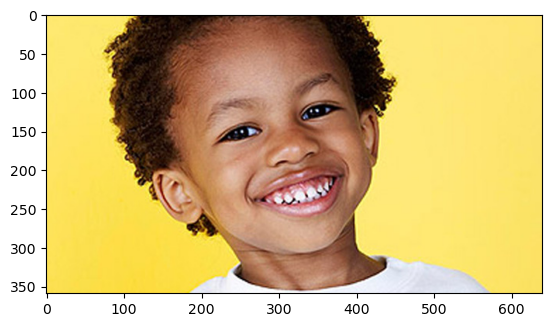

In [74]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [75]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [76]:
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

In [16]:
gray.shape

(480, 640)

In [17]:
face = faceCascade.detectMultiScale(gray,1.1,4)
for x,y,w,h in face:
    gray_roi = gray[y:y+h, x:x+w]
    color_roi = frame[y:y+h, x:x+w]
    cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 0, 255), 2)
    faces = faceCascade.detectMultiScale(gray_roi)
    if len(faces) == 0:
        print("FACE COULD NOT FOUND")
    else:
        for (ex,ey,ew,eh) in faces:
            face_roi = color_roi[ey: ey+eh, ex:ex + ew]

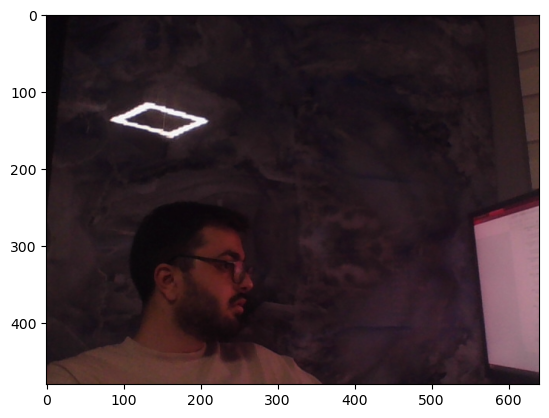

In [18]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [19]:
plt.imshow(cv2.cvtColor(face_roi, cv2.COLOR_BGR2RGB))

NameError: name 'face_roi' is not defined

In [15]:
final_img = cv2.resize(face_roi, (224,224))
final_img = np.expand_dims(final_img, axis = 0)
final_img = final_img/255.0

NameError: name 'face_roi' is not defined

In [86]:
Prediction = new_model.predict(final_img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


In [87]:
Prediction[0]

array([7.2109377e-01, 4.6711784e-06, 3.6085322e-03, 2.3264024e-02,
       2.1285781e-01, 3.9088249e-02, 8.2870436e-05], dtype=float32)

In [88]:
np.argmax(Prediction)

0

In [3]:
import cv2

path = "haarcascade_frontalface_default.xml"
font_scale = 1
font = cv2.FONT_HERSHEY_PLAIN

rectangle_bgr = (255, 255, 255)
img = np.zeros((500, 500))
text = "..."
(text_width, text_height) = cv2.getTextSize(text, font, fontScale=font_scale, thickness=1)[0]
text_offset_x = 10
text_offset_y = img.shape[0]-25
box_cords = ((text_offset_x, text_offset_y), (text_offset_x + text_width + 2, text_offset_y - text_height - 2))
cv2.rectangle(img, box_cords[0], box_cords[1], rectangle_bgr, cv2.FILLED)
cv2.putText(img, text, (text_offset_x, text_offset_y), font, fontScale=font_scale, color=(0, 0, 0), thickness=1)

cam = cv2.VideoCapture(1)

if not cam.isOpened():
    cam = cv2.VideoCapture(0)
if not cam.isOpened():
    raise IOError("WEBCAM COULD NOT OPEN")
    
while True:
    ret,frame = cam.read()
    faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    face = faceCascade.detectMultiScale(gray, 1.1, 4)
    for x,y,w,h in face:
        gray_roi = gray[y:y+h, x:x+w]
        color_roi = frame[y:y+h, x:x+w]
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 0, 255), 2)
        faces = faceCascade.detectMultiScale(gray_roi)
        if len(faces) == 0:
            print("FACE COULD NOT FOUND")
        else:
            for (ex,ey,ew,eh) in faces:
                face_roi = color_roi[ey: ey+eh, ex:ex + ew] 
    final_img = cv2.resize(face_roi, (224,224))
    final_img = np.expand_dims(final_img, axis = 0)
    final_img = final_img/255.0
    
    font = cv2.FONT_HERSHEY_SIMPLEX
    
    Prediction = new_model.predict(final_img)
    
    font_scale = 1.5
    font = cv2.FONT_HERSHEY_PLAIN
    
    if(np.argmax(Prediction)==0):
        status = "Angry"
        
        cv2.putText(frame, status, (100, 150), font, 3,(255, 0, 0),2,cv2.LINE_4)
        cv2.rectangle(frame, (x,y), (x+w, y+h), (255,0,0))
    
    elif(np.argmax(Prediction)==1):
        status = "Disgust"
        
        cv2.putText(frame, status, (100, 150), font, 3,(255, 0, 0),2,cv2.LINE_4)
        cv2.rectangle(frame, (x,y), (x+w, y+h), (255,0,0))
        
    elif(np.argmax(Prediction)==2):
        status = "Fear"
        
        cv2.putText(frame, status, (100, 150), font, 3,(255, 0, 0),2,cv2.LINE_4)
        cv2.rectangle(frame, (x,y), (x+w, y+h), (255,0,0))
        
    elif(np.argmax(Prediction)==3):
        status = "Happy"
        
        cv2.putText(frame, status, (100, 150), font, 3,(255, 0, 0),2,cv2.LINE_4)
        cv2.rectangle(frame, (x,y), (x+w, y+h), (255,0,0))
        
    elif(np.argmax(Prediction)==4):
        status = "Sad"
        
        cv2.putText(frame, status, (100, 150), font, 3,(255, 0, 0),2,cv2.LINE_4)
        cv2.rectangle(frame, (x,y), (x+w, y+h), (255,0,0))
        
    elif(np.argmax(Prediction)==5):
        status = "Surprise"
        
        cv2.putText(frame, status, (100, 150), font, 3,(255, 0, 0),2,cv2.LINE_4)
        cv2.rectangle(frame, (x,y), (x+w, y+h), (255,0,0))
        
    else:
        status = "Neutral"
        
        cv2.putText(frame, status, (100, 150), font, 3,(255, 0, 0),2,cv2.LINE_4)
        cv2.rectangle(frame, (x,y), (x+w, y+h), (255,0,0))
        
        
    cv2.imshow('Final', frame)
    
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break
       
cam.release()
cv2.destroyAllWindows()

NameError: name 'face_roi' is not defined